# Example of sequential Bayesian paramter learning.

## Reproducing Fig 3.7 in Bishop's "Pattern Recognition and Machine Learning," 2009 edition.

In [2]:
import os, sys
%pylab inline
plt.style.use("default")

Populating the interactive namespace from numpy and matplotlib


In [3]:
def gen_data(a_true, β, n):
    x = np.random.uniform(-1, 1, n)
    y = a_true[0] + a_true[1]*x + np.random.normal(0, 1/β, n)
    return x, y

def draw_line(a, **kwargs):
    x = np.linspace(-1, 1, 100)
    y = a[0] + a[1]*x
    plot(x, y, "r-", **kwargs)

In [4]:
def plot_function_contours(f, **kwargs):
    x = np.linspace(-1, 1, 100)
    X, Y = np.meshgrid(x, x)
    Z = np.zeros_like(X)
    for i in range(len(x)):
        for j in range(len(x)):
            Z[i, j] = f(np.array([X[i, j], Y[i, j]]))
    plt.contourf(X, Y, Z, **kwargs, cmap="jet")

def likelihood(x, y, β):
    return lambda a: np.exp(-0.5*β*np.sum((y - a[0] - a[1]*x)**2))

def posterior(mean, Prec):
    return lambda a: np.exp(-0.5*(a - mean) @ Prec @ (a - mean))
            

In [27]:
n_data = 100
a_true = [-0.3, 0.5]
β = 25
np.random.seed(4)
x, y = gen_data(a_true, β, n_data)

In [28]:
α = 2
I = np.eye(2)
mean_hist = [[0, 0]]
Prec_hist = [I*α]
for i in range(n_data):
    Phi = np.array([1, x[i]])
    Phi_t_Phi = np.outer(Phi, Phi)
    Prec_n = Prec_hist[-1] + β*Phi_t_Phi

    mean_n = np.linalg.solve(Prec_n,
                             Prec_hist[-1] @ mean_hist[-1] + β*y[i]*Phi)
    Prec_hist.append(Prec_n)
    mean_hist.append(mean_n)

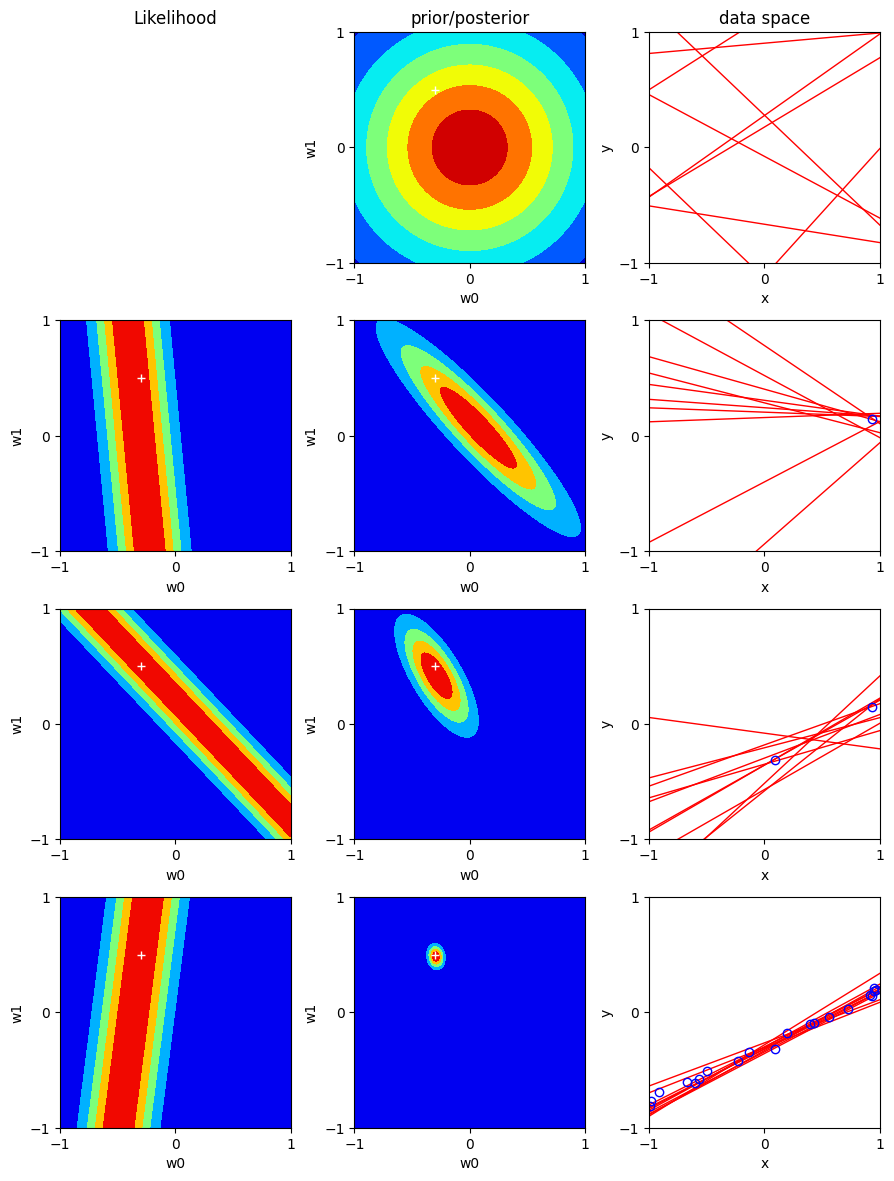

In [34]:
which_iters = [0, 1, 2, 20]
n_rows = len(which_iters)
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows*3))
for i, idata in enumerate(which_iters):

    # Likelihood 
    plt.sca(axes[i, 0])
    if idata > 0:
        plot_function_contours(likelihood(x[idata], y[idata], β), levels=5)
        plot(a_true[0], a_true[1], "w+")
        axis("square")
    else:
        axis("square")
        # Make the axis invisible but don't disable it,
        # so the title aligns with the other plots.
        gca().set_frame_on(False)
        gca().get_xaxis().set_visible(False)
        gca().get_yaxis().set_visible(False)        
        title("Likelihood")

    # Prior/Posterior
    plt.sca(axes[i,1])
    plot_function_contours(posterior(mean_hist[idata], Prec_hist[idata]), levels=5)
    plot(a_true[0], a_true[1], "w+")
    axis("square")
    i == 0 and title("prior/posterior")

    # Data space
    plt.sca(axes[i,2])
    # Sample 10 slopes from the posterior
    a_samp = np.random.multivariate_normal(mean_hist[idata], np.linalg.inv(Prec_hist[idata]), 10)
    for a in a_samp:
        draw_line(a, lw=1)
    plot(x[:idata], y[:idata], "o", color="b", markerfacecolor="none")
    xlabel("x"); ylabel("y")
    axes[i,2].set_aspect("equal")
    axes[i,2].set_xlim(-1, 1); axes[i,2].set_ylim(-1, 1);
    
    i == 0 and title("data space")

    [axes[i,j].set_xticks([-1, 0, 1]) for j in range(3)]
    [axes[i,j].set_yticks([-1, 0, 1]) for j in range(3)]
    [axes[i,j].set_xlabel("w0") for j in range(2)]
    [axes[i,j].set_ylabel("w1") for j in range(2)]
    #break

plt.tight_layout(w_pad=1, h_pad=0)
